In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import mlflow
import mlflow.sklearn

In [2]:
df = pd.read_csv("medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# EDA

## A. Univariate Analysis (Single Variable):

1. What is the distribution of medical insurance charges?

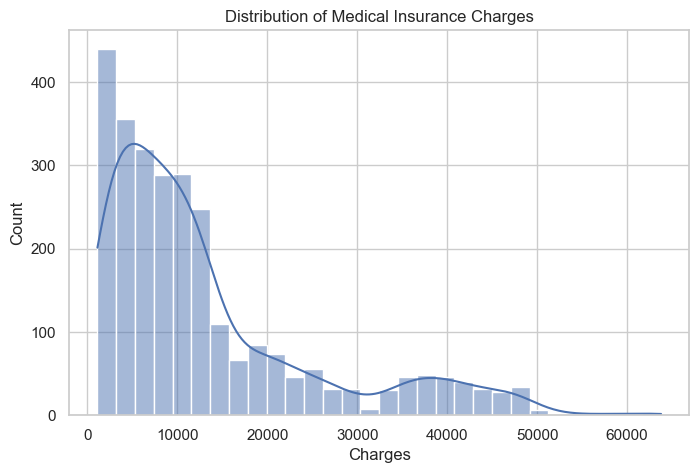

In [6]:
# Set a clean style
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribution of Medical Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

2. What is the age distribution of the individuals?

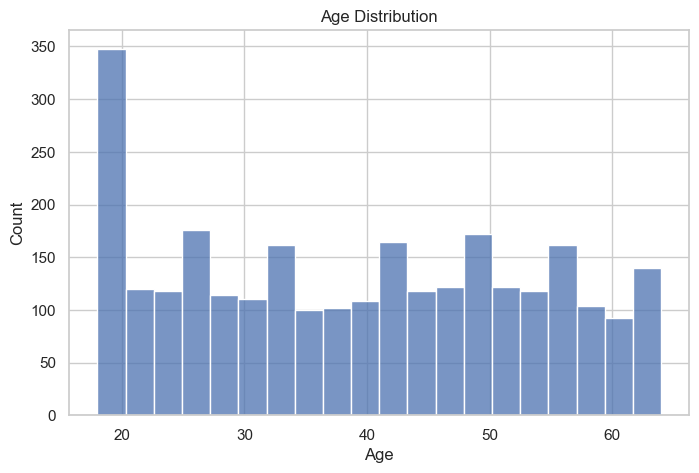

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

3. How many people are smokers vs non-smokers?

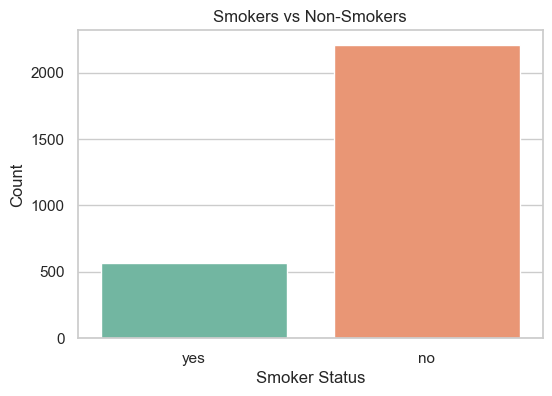

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='smoker', data=df, hue='smoker', palette='Set2', legend=False)
plt.title('Smokers vs Non-Smokers')
plt.xlabel('Smoker Status')
plt.ylabel('Count')
plt.show()

4. What is the average BMI in the dataset?

In [9]:
avg_bmi = df['bmi'].mean()
print(f"Average BMI in the dataset: {avg_bmi:.2f}")

Average BMI in the dataset: 30.70


5. Which regions have the most number of policyholders?

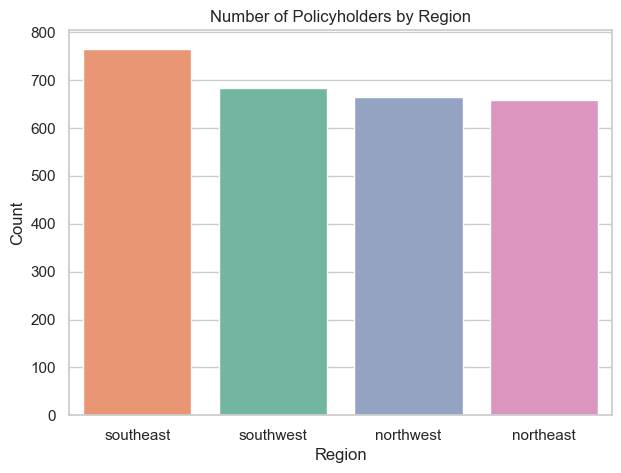

In [10]:
plt.figure(figsize=(7,5))
sns.countplot(x='region', data=df, order=df['region'].value_counts().index, hue= 'region', palette='Set2', legend=False)
plt.title('Number of Policyholders by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

## B. Bivariate Analysis (Two Variables):

6. How do charges vary with age?

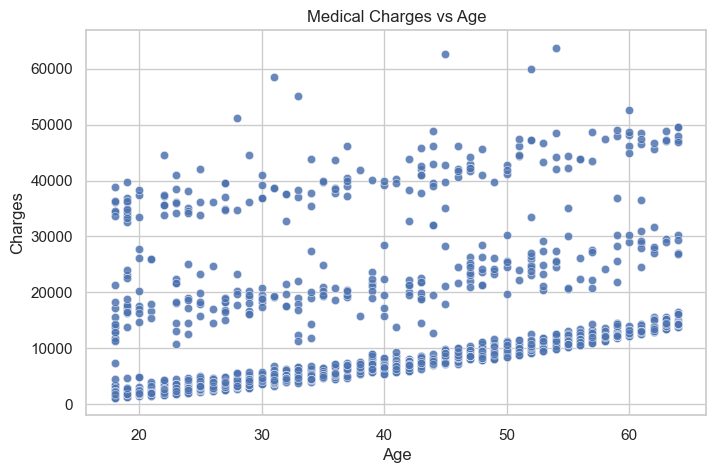

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='charges', data=df, alpha=0.6)
plt.title('Medical Charges vs Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

7. Is there a difference in average charges between smokers and non-smokers?

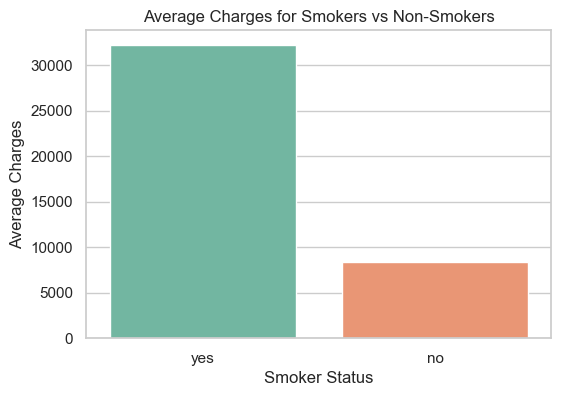

In [12]:
plt.figure(figsize=(6,4))
sns.barplot(x='smoker', y='charges', data=df, errorbar=None, hue= 'smoker', palette='Set2', legend= False)
plt.title('Average Charges for Smokers vs Non-Smokers')
plt.xlabel('Smoker Status')
plt.ylabel('Average Charges')
plt.show()

8. Does BMI impact insurance charges?

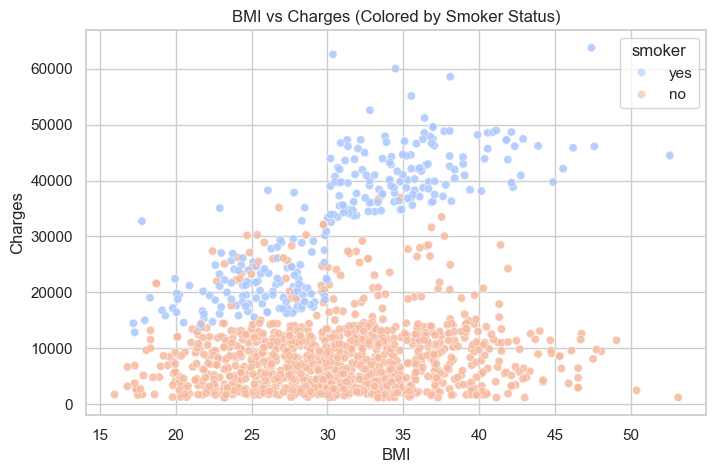

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, alpha=0.6, palette='coolwarm')
plt.title('BMI vs Charges (Colored by Smoker Status)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

9. Do men or women pay more on average?

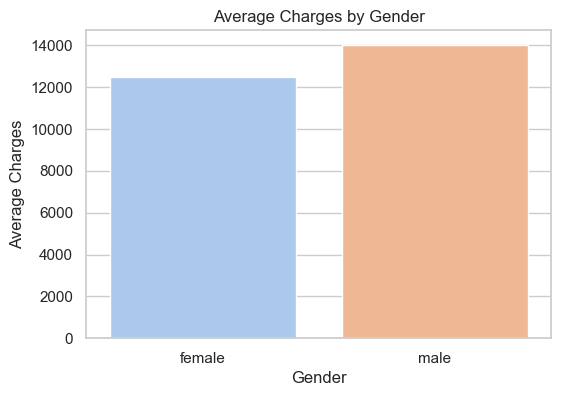

In [14]:
plt.figure(figsize=(6,4))
sns.barplot(x='sex', y='charges', data=df, errorbar=None, hue= 'sex', palette='pastel', legend= False)
plt.title('Average Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Charges')
plt.show()

10. Is there a correlation between the number of children and the insurance charges?

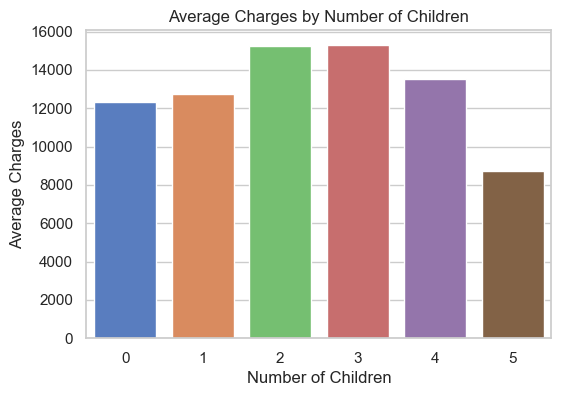

In [15]:
plt.figure(figsize=(6,4))
sns.barplot(x='children', y='charges', data=df, errorbar=None, hue= 'children', palette='muted', legend= False)
plt.title('Average Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.show()

## C. Multivariate Analysis (More than Two Variables):

11. How does smoking status combined with age affect medical charges?

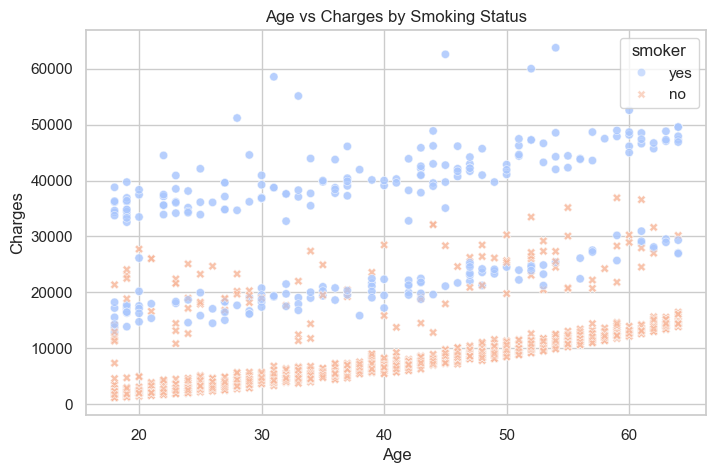

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='charges', hue='smoker', style='smoker', data=df, alpha=0.6, palette='coolwarm')
plt.title('Age vs Charges by Smoking Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

12. What is the impact of gender and region on charges for smokers?

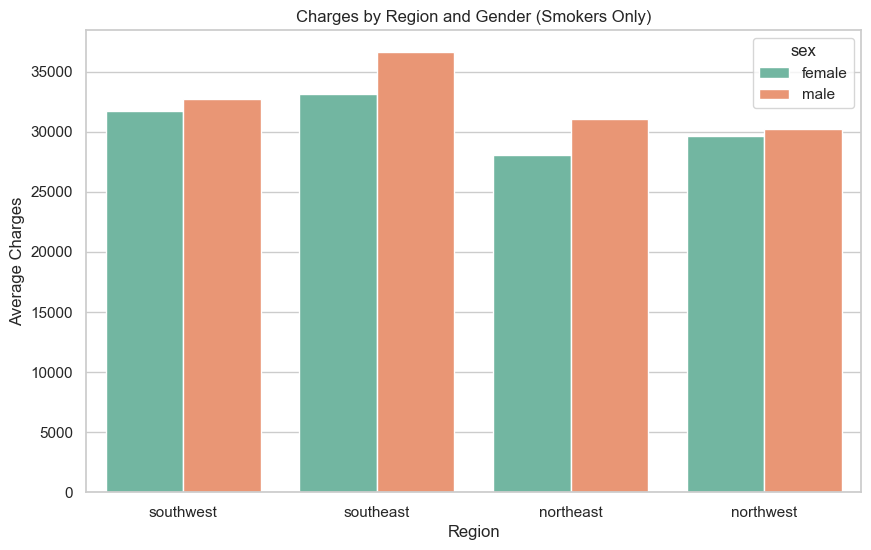

In [17]:
smokers_df = df[df['smoker'] == 'yes']
plt.figure(figsize=(10,6))
sns.barplot(x='region', y='charges', hue='sex', data=smokers_df, errorbar=None, palette='Set2')
plt.title('Charges by Region and Gender (Smokers Only)')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()

13. How do age, BMI, and smoking status together affect insurance cost?

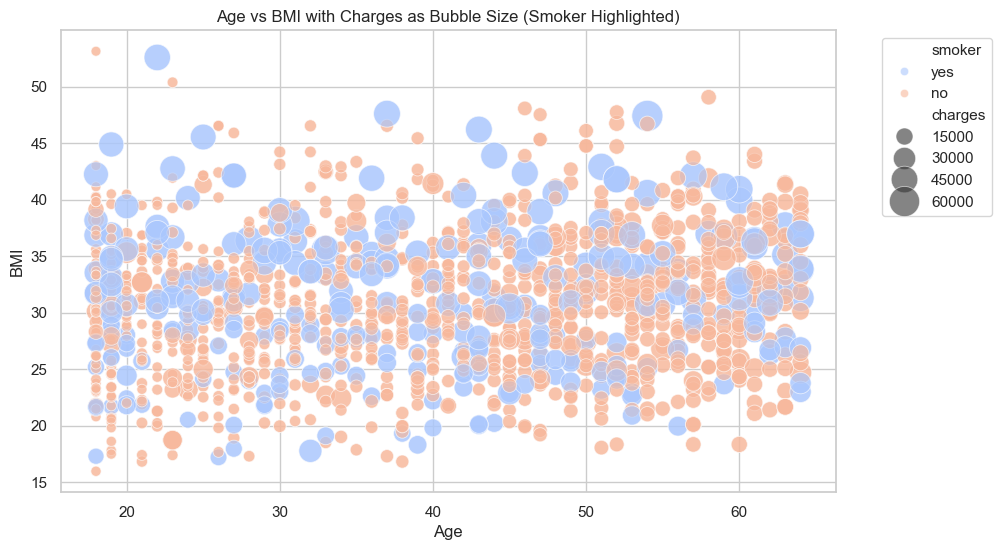

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='bmi', size='charges', hue='smoker', data=df, sizes=(50, 500), alpha=0.6, palette='coolwarm')
plt.title('Age vs BMI with Charges as Bubble Size (Smoker Highlighted)')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

14. Do obese smokers (BMI > 30) pay significantly higher than non-obese
non-smokers?

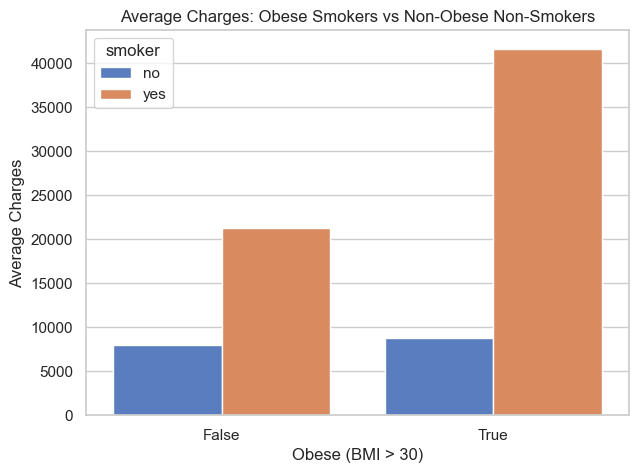

In [19]:
df['obese'] = df['bmi'] > 30
grouped = df.groupby(['obese', 'smoker'])['charges'].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(x='obese', y='charges', hue='smoker', data=grouped, palette='muted')
plt.title('Average Charges: Obese Smokers vs Non-Obese Non-Smokers')
plt.xlabel('Obese (BMI > 30)')
plt.ylabel('Average Charges')
plt.show()

## D. Outlier Detection:

15. Are there outliers in the charges column? Who are the individuals paying the
highest costs?

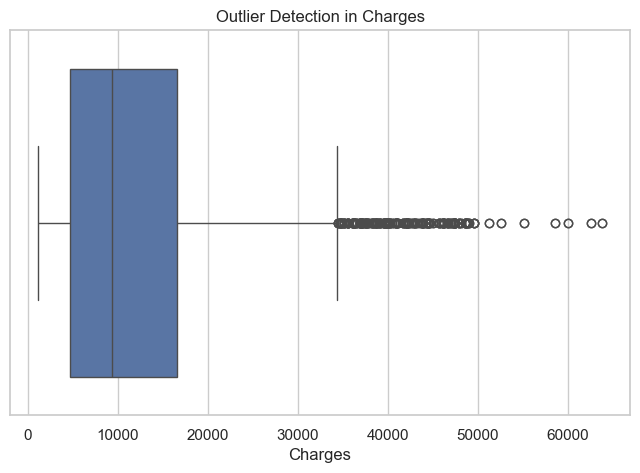

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['charges'])
plt.title('Outlier Detection in Charges')
plt.xlabel('Charges')
plt.show()

In [21]:
# Individuals paying the highest costs (Top 5)
top_charges = df.sort_values(by='charges', ascending=False).head(5)
print("Top 5 individuals paying the highest medical costs:")
display(top_charges)

Top 5 individuals paying the highest medical costs:


,age,sex,bmi,children,smoker,region,charges,obese
543,54,female,47.410,0,yes,southeast,63770.42801,True
1929,54,female,47.410,0,yes,southeast,63770.42801,True
1300,45,male,30.360,0,yes,southeast,62592.87309,True
2686,45,male,30.360,0,yes,southeast,62592.87309,True
2616,52,male,34.485,3,yes,northwest,60021.39897,True


16. Are there extreme BMI values that could skew predictions?

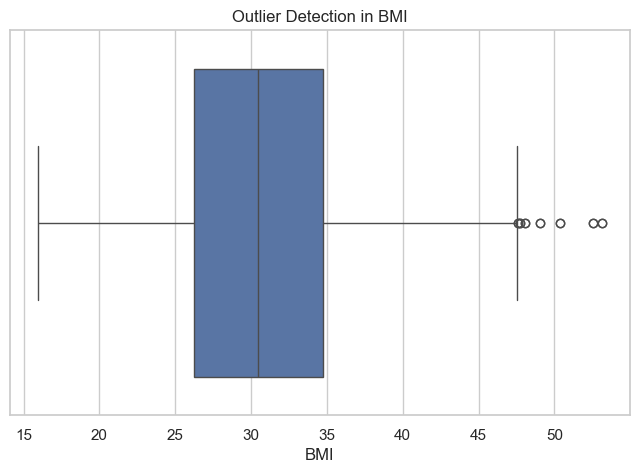

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['bmi'])
plt.title('Outlier Detection in BMI')
plt.xlabel('BMI')
plt.show()

In [23]:
# Check numerical values of extreme BMI (Top & Bottom 5)
top_bmi = df.sort_values(by='bmi', ascending=False).head(5)
bottom_bmi = df.sort_values(by='bmi', ascending=True).head(5)

print("Top 5 highest BMI values:")
display(top_bmi)
print("\nBottom 5 lowest BMI values:")
display(bottom_bmi)

Top 5 highest BMI values:


,age,sex,bmi,children,smoker,region,charges,obese
1317,18,male,53.13,0,no,southeast,1163.4627,True
2703,18,male,53.13,0,no,southeast,1163.4627,True
1047,22,male,52.58,1,yes,southeast,44501.3982,True
2433,22,male,52.58,1,yes,southeast,44501.3982,True
847,23,male,50.38,1,no,southeast,2438.0552,True



Bottom 5 lowest BMI values:


,age,sex,bmi,children,smoker,region,charges,obese
1558,18,male,15.960,0,no,northeast,1694.79640,False
172,18,male,15.960,0,no,northeast,1694.79640,False
428,21,female,16.815,1,no,northeast,3167.45585,False
1814,21,female,16.815,1,no,northeast,3167.45585,False
1226,38,male,16.815,2,no,northeast,6640.54485,False


## E. Correlation Analysis:

17. What is the correlation between numeric features like age, BMI, number of
children, and charges?

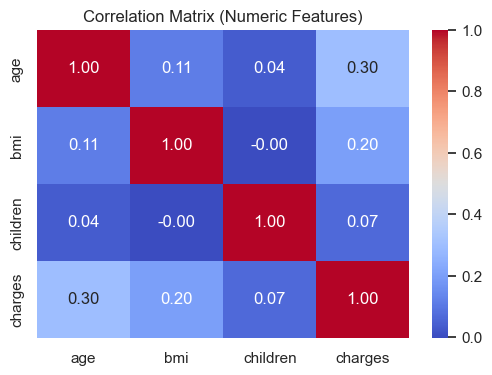

In [24]:
# Select only numeric columns
numeric_cols = ['age', 'bmi', 'children', 'charges']

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

18. Which features have the strongest correlation with the target variable
(charges)?

In [25]:
charges_corr = corr_matrix['charges'].drop('charges').sort_values(ascending=False)
print("Correlation of features with 'charges':")
print(charges_corr)

Correlation of features with 'charges':
age         0.298624
bmi         0.199846
children    0.066442
Name: charges, dtype: float64


## Model Building + Integrating MLFlow

In [26]:
#Separate features and target

X = df.drop("charges", axis=1)
y = df["charges"]

In [27]:
#Identify categorical & numerical columns

categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(exclude=["object"]).columns

In [28]:
#Preprocessing pipeline

categorical_transformer = OneHotEncoder(handle_unknown="ignore")
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

In [29]:
#Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
#Define models

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, eval_metric="rmse")
}

In [ ]:
#Train, predict & evaluate

results = {}

# Loop through models and log with MLflow
for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        
        # Create pipeline (preprocessing + model)
        pipeline = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("model", model)
        ])
        
        # Fit on training set
        pipeline.fit(X_train, y_train)
        
        # Predictions
        preds = pipeline.predict(X_test)
        
        # Metrics
        mae = mean_absolute_error(y_test, preds)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        r2 = r2_score(y_test, preds)
        
        results[model_name] = {"MAE": mae, "RMSE": rmse, "R2": r2}
        
        # Log params (hyperparameters of the model)
        mlflow.log_param("model", model_name)
        if hasattr(model, "get_params"):   # log model-specific params
            params = model.get_params()
            for p, v in params.items():
                mlflow.log_param(p, v)
        
        # Log metrics
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("R2", r2)
        
        # Log model artifact
        mlflow.sklearn.log_model(pipeline, name="model")
        
        print(f"✅ {model_name} logged with MLflow: MAE={mae:.2f}, RMSE={rmse:.2f}, R2={r2:.3f}")

2025/08/17 14:54:42 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2025/08/17 14:54:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instea

✅ Linear Regression logged with MLflow: MAE=4267.20, RMSE=6274.85, R2=0.743


2025/08/17 14:54:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/17 14:54:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Random Forest logged with MLflow: MAE=1275.53, RMSE=2702.68, R2=0.952


2025/08/17 14:54:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/17 14:55:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ XGBoost logged with MLflow: MAE=1133.11, RMSE=2567.35, R2=0.957


In [32]:
#Show results

results_df = pd.DataFrame(results).T
print(results_df)

                           MAE         RMSE        R²
Linear Regression  4267.197684  6274.845539  0.743462
Random Forest      1275.525395  2702.676657  0.952408
XGBoost            1133.108148  2567.347913  0.957055


In [38]:


# Select best model based on R²
best_model_name = max(results, key=lambda m: results[m]["R2"])
print(f"\n🏆 Best Model: {best_model_name} with R²={results[best_model_name]['R2']:.3f}")


🏆 Best Model: XGBoost with R²=0.957


In [34]:
# Retrain best model on full data
best_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", models[best_model_name])
])
best_pipeline.fit(X, y)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [39]:
# Register best model in MLflow Model Registry
with mlflow.start_run(run_name=f"{best_model_name}_Final"):
    mlflow.sklearn.log_model(best_pipeline, "insurance_cost_model", registered_model_name="InsuranceCostModel")
    print(f"🎯 Best model {best_model_name} registered in MLflow Model Registry!")

2025/08/17 15:03:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/17 15:03:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🎯 Best model XGBoost registered in MLflow Model Registry!


Successfully registered model 'InsuranceCostModel'.
Created version '1' of model 'InsuranceCostModel'.


In [35]:
import joblib
joblib.dump(best_pipeline, "insurance_cost_model.pkl")

['insurance_cost_model.pkl']